# Benchmark Radar Chart

In [1]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Build a Pandas DF with example reference Metrics, Players, and Data 

In [119]:
# list of metrics

metrics = ["npxG", "npGoals", "ShotsOT", "xA", "Assists"]   

# list of relevant players

players = [player1, player2, player3, player4, player5, player6, player7]

# list of data of metrics per player (the df rows)
# list of names of metrics (the df columns)

columns = metrics
player1 = [17,19,71,7,8]
player2 = [22,18,65,6,9]
player3 = [14,17,43,5,7]
player4 = [22,24,88,7,8]
player5 = [23,20,70,3,5]
player6 = [27,28,66,7,6]
player7 = [30,29,75,10,13]



In [120]:
# put the list elements in lists with column names

npxG = [item[0] for item in players]
npGoals = [item[1] for item in players]
ShotsOT = [item[2] for item in players]
xA = [item[3] for item in players]
Assists = [item[4] for item in players]

In [121]:
# zip up the column lists
zipped = list(zip(npxG, npGoals, ShotsOT, xA, Assists))

In [122]:
# create the DF
benchmark_players = pd.DataFrame(zipped,columns=["npxG", "npGoals", "ShotsOT", "xA", "Assists"])

In [123]:
benchmark_players

,npxG,npGoals,ShotsOT,xA,Assists
0,17,19,71,7,8
1,22,18,65,6,9
2,14,17,43,5,7
3,22,24,88,7,8
4,23,20,70,3,5
5,27,28,66,7,6
6,30,29,75,10,13


In [124]:
# Now make the lower and upper boundary lists for the Radar function

low_bound = []
high_bound = []

In [125]:
# subtract 10% more for the low boundary

for i in benchmark_players.columns:
    low_bound.append(benchmark_players[i].min()*(1-.1))    

In [126]:
low_bound

[12.6, 15.3, 38.7, 2.7, 4.5]

In [127]:
# add 10% more for the high boundary
for i in benchmark_players.columns:
    high_bound.append(benchmark_players[i].max()*(1+.1))

In [128]:
# round high_bound because the decimals are excessive
high_bound = [item.round(1) for item in high_bound]


In [129]:
# Get the mean average list for the benchmark radar plot
mean_bound=[]
for i in benchmark_players.columns:
    mean_bound.append(benchmark_players[i].mean().round())    

## 2. Get prospects(s) that you want to compare against the benchmark (and against each other)

In [130]:
# Get list(s) of metric data for each player

prospect_1 =  [32, 33, 70, 8, 9]
prospect_2 = [30, 31, 65, 11, 13]

In [132]:
# turn lists into numpy arrays so that we can divide them to get relative percentages

prospect_1_values_numpy = np.asarray(prospect_1)
prospect_2_values_numpy = np.asarray(prospect_2)
mean_bound_numpy = np.asarray(mean_bound)

In [133]:
# save the results

prospect_1_percentages = prospect_1_values_numpy / mean_bound_numpy 
prospect_2_percentages = prospect_2_values_numpy / mean_bound_numpy 

In [134]:
# subtract 1 from each results to get the percentages

prospect_1_final = [item -1 for item in prospect_1_percentages]
prospect_2_final = [item -1 for item in prospect_2_percentages]

In [135]:
# round the answers to 3 decimal places

prospect_1_final = [item.round(3) for item in prospect_1_final]
prospect_2_final = [item.round(3) for item in prospect_2_final]

In [136]:
# convert the decimals to percentages

prospect_1_per=[]
prospect_2_per=[]

In [137]:
# round percentages to one decimal place

for i in prospect_1_final:
    prospect_1_per.append("{:.1%}".format(i))
print(prospect_1_per)

['45.5%', '50.0%', '2.9%', '33.3%', '12.5%']


In [138]:
for i in prospect_2_final:
    prospect_2_per.append("{:.1%}".format(i))
print(prospect_2_per)

['36.4%', '40.9%', '-4.4%', '83.3%', '62.5%']


## Create the Radar Chart with Benchmark Layer

In [139]:
# put the three lists into Radar function 
radar = Radar(metrics, low_bound, high_bound,
              # set the number of parameters to match your 'params' list
              round_int=[True]*5,
              # the number of concentric circles (excluding center circle)
              num_rings=5,  
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

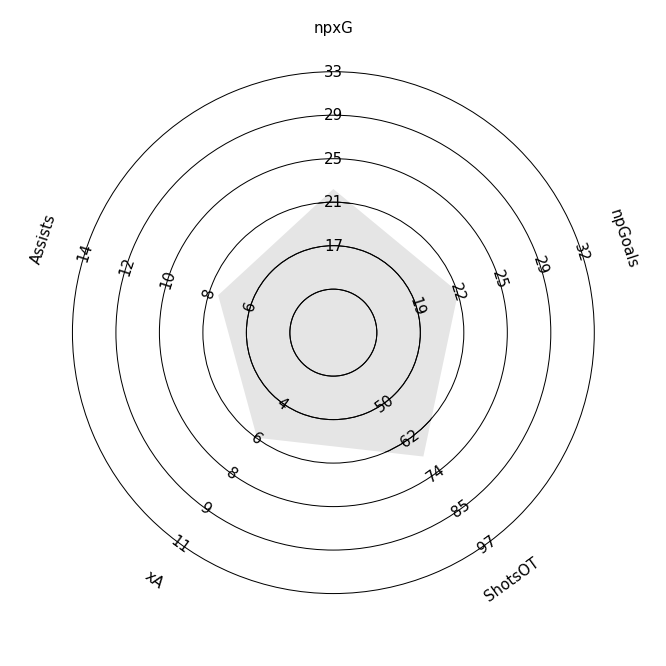

In [164]:
# format axis as a radar
fig, ax = radar.setup_axis()  

rings_inner = radar.draw_circles(ax=ax, facecolor='none', edgecolor='black', alpha=1)

# draw radar map
radar_output = radar.draw_radar(mean_bound, ax=ax,
                                kwargs_radar={'facecolor': 'black', 'alpha': .1},
                                kwargs_rings={'facecolor': 'none', 'alpha': 1})

range_labels = radar.draw_range_labels(ax=ax, fontsize=15)                                       
param_labels = radar.draw_param_labels(ax=ax, fontsize=15)     

## Plot the Prospect Radar Maps

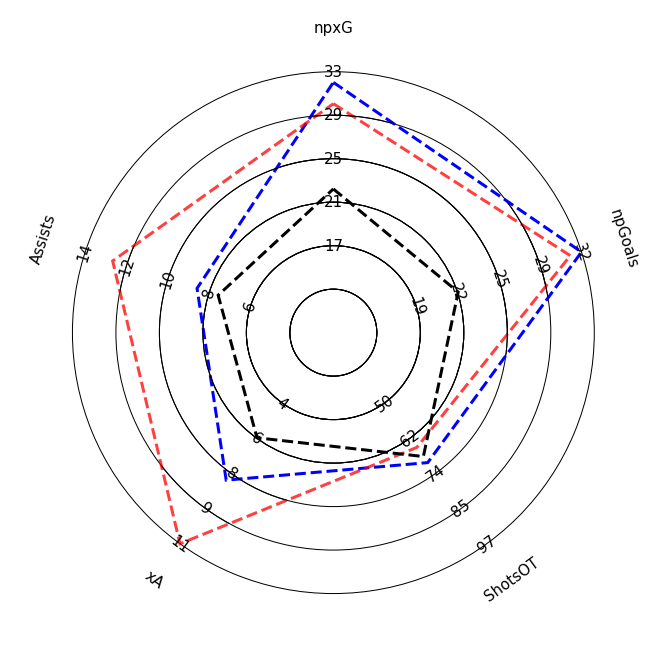

In [165]:
# format axis as a radar
fig, ax = radar.setup_axis()  

rings_inner = radar.draw_circles(ax=ax, facecolor='none', edgecolor='black', alpha=1)


# draw radar maps


radar_output = radar.draw_radar(prospect_1, ax=ax,
                                kwargs_radar={'edgecolor': 'blue','facecolor': 'none', 'ls':'--', 'lw':'3', 'alpha': 1},
                                kwargs_rings={'facecolor': 'none', 'alpha': 1})

radar_output = radar.draw_radar(prospect_2, ax=ax,
                                kwargs_radar={'edgecolor':'red','facecolor': 'none', 'ls':'--', 'lw':'3', 'alpha': .75},
                                kwargs_rings={'facecolor': 'none', 'alpha': 1})

radar_output = radar.draw_radar(mean_bound, ax=ax,
                                kwargs_radar={'edgecolor': 'black','facecolor': 'none', 'ls':'--', 'lw':'3', 'alpha': 1},
                                kwargs_rings={'facecolor': 'none', 'alpha': 1})


range_labels = radar.draw_range_labels(ax=ax, fontsize=15)                                       
param_labels = radar.draw_param_labels(ax=ax, fontsize=15)     

In [166]:
# Now put the three way plot in a background

In [167]:
def radar_mosaic(radar_height=0.8, title_height=0.2, figheight=10):
    
    if title_height + radar_height > 1:
        error_msg = 'Reduce one of the radar_height or title_height so the total is ≤ 1.'
        raise ValueError(error_msg)
    endnote_height = 1 - title_height - radar_height
    figwidth = figheight * radar_height
    figure, axes = plt.subplot_mosaic([['title'], ['radar'], ['endnote']],
                                      gridspec_kw={'height_ratios': [title_height, radar_height,
                                                                     endnote_height],
                                                   # the grid takes up the whole of the figure 0-1
                                                   'bottom': 0, 'left': 0, 'top': 1,
                                                   'right': 1, 'hspace': 0},
                                      figsize=(figwidth, figheight))
    axes['title'].axis('off')
    axes['endnote'].axis('off')
    return figure, axes

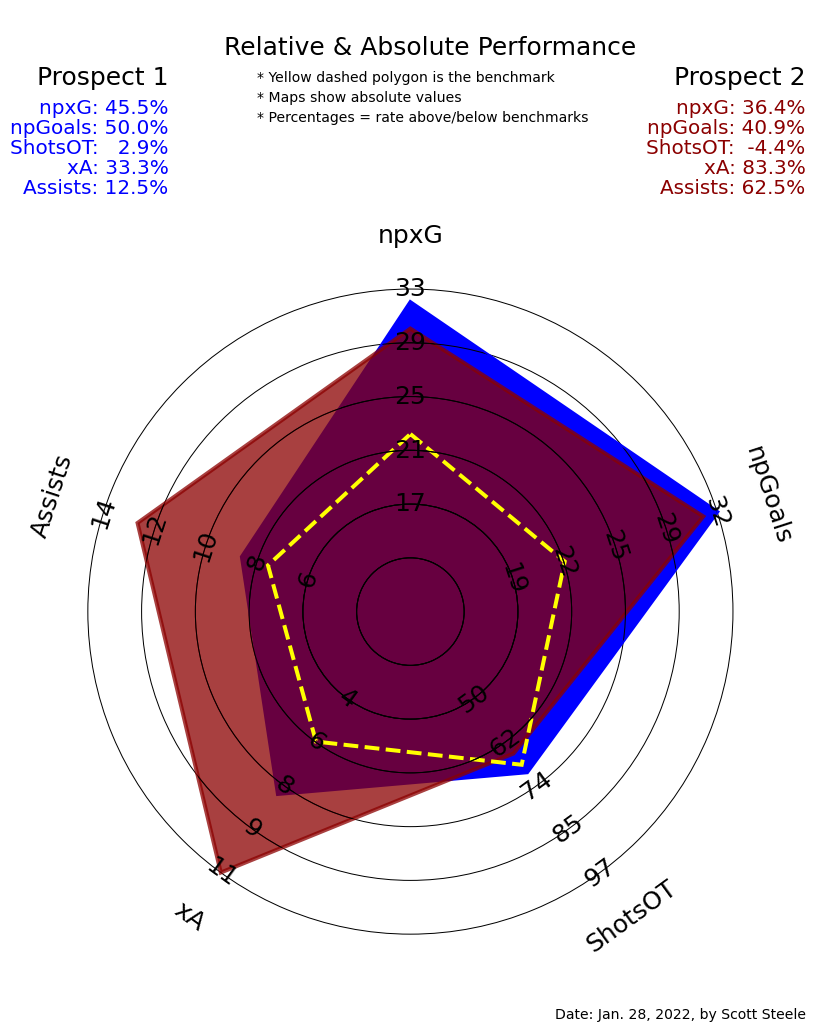

In [158]:
fig, axs = radar_mosaic(radar_height=0.8, title_height=0.2, figheight=14)


# Plot the radar map
radar.setup_axis(ax=axs['radar'])
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='none', edgecolor='black',label='test')


radar_output = radar.draw_radar(prospect_1, ax=axs['radar'],
                                kwargs_radar={'edgecolor': 'blue','facecolor': 'blue', 'ls':'-', 'lw':'4', 'alpha': 1},
                                kwargs_rings={'facecolor': 'none', 'alpha': 1})

radar_output = radar.draw_radar(prospect_2, ax=axs['radar'],
                                kwargs_radar={'edgecolor': 'darkred','facecolor': 'darkred','ls':'-', 'lw':'4', 'alpha': .75},
                                kwargs_rings={'facecolor': 'none', 'alpha': 1, 'label':'test'})

radar_output = radar.draw_radar(mean_bound, ax=axs['radar'],
                                kwargs_radar={'edgecolor': 'yellow','facecolor': 'none', 'ls':'--', 'lw':'4', 'alpha': 1}, 
                                kwargs_rings={'facecolor': 'none', 'alpha': 1})


range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25)                                    
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25)
                                    
# Plot Titles

endnote_text = axs['endnote'].text(0.99, 0.1, 'Date: Jan. 28, 2022, by Scott Steele', fontsize=14, color='black',
                                    ha='right', va='center')

title1_text = axs['title'].text(0.78, 0.8, 'Relative & Absolute Performance', fontsize=25, color='black',
                                    ha='right', va='center')   
  
title1_text = axs['title'].text(0.31, 0.65, '* Yellow dashed polygon is the benchmark', fontsize=14, color='black',
                                    ha='left', va='center')     
title1_text = axs['title'].text(0.31, 0.55, '* Maps show absolute values', fontsize=14, color='black',
                                    ha='left', va='center')  
title1_text = axs['title'].text(0.31, 0.45, '* Percentages = rate above/below benchmarks', fontsize=14, color='black',
                                    ha='left', va='center')  


title1_text = axs['title'].text(0.2, 0.65, 'Prospect 1', fontsize=25, color='black',
                                    ha='right', va='center')
#title2_text = axs['title'].text(0.2, 0.5, 'Team 1', fontsize=20,
#                                    ha='right', va='center', color='blue')
title3_text = axs['title'].text(0.99, 0.65, 'Prospect 2', fontsize=25,
                                    ha='right', va='center', color='black')
#title4_text = axs['title'].text(0.99, 0.65, 'Team 2', fontsize=20,
#                                    ha='right', va='center', color='darkred')

# Put the stats in the title plots

title5_text = axs['title'].text(0.2, 0.5, params[0] + ": " + prospect_1_per[0], fontsize=20,
                                    ha='right', va='center', color='blue')

title6_text = axs['title'].text(0.2, 0.4, params[1] + ": " + prospect_1_per[1], fontsize=20,
                                    ha='right', va='center', color='blue')

title7_text = axs['title'].text(0.2, 0.3, params[2] + ":   " + prospect_1_per[2], fontsize=20,
                                    ha='right', va='center', color='blue')
title8_text = axs['title'].text(0.2, 0.2, params[3] + ": " + prospect_1_per[3], fontsize=20,
                                    ha='right', va='center', color='blue')

title9_text = axs['title'].text(0.2, 0.1, params[4] + ": " + prospect_1_per[4], fontsize=20,
                                    ha='right', va='center', color='blue')




title10_text = axs['title'].text(0.99, 0.5, params[0] + ": " + prospect_2_per[0], fontsize=20,
                                    ha='right', va='center', color='darkred')

title11_text = axs['title'].text(0.99, 0.4, params[1] + ": " + prospect_2_per[1], fontsize=20,
                                    ha='right', va='center', color='darkred')

title12_text = axs['title'].text(0.99, 0.3, params[2] + ":  " + prospect_2_per[2], fontsize=20,
                                    ha='right', va='center', color='darkred')

title13_text = axs['title'].text(0.99, 0.2, params[3] + ": " + prospect_2_per[3], fontsize=20,
                                    ha='right', va='center', color='darkred')

title14_text = axs['title'].text(0.99, 0.1, params[4] + ": " + prospect_2_per[4], fontsize=20,
                                    ha='right', va='center', color='darkred')
